## Prepare Data

### Anime Recommendations Database

#### Anime Listing

In [130]:
import pandas as pd
cuAnime = pd.read_csv("E:\\applied data science capstone\\data\\CooperUnion\\archive\\anime.csv")

In [131]:
# remove hentai genre and filter for tv and movie in the type feature
no_hentai_df = cuAnime.loc[cuAnime["genre"] != "Hentai", :]
cu_anime_df = no_hentai_df.loc[~no_hentai_df["type"].isin(["Music", "ONA", "OVA", "Special"]), :]

genre_df = cu_anime_df["genre"].value_counts().to_frame()
genre_df = genre_df.reset_index()
genre_df.describe()

,count
count,2197.000000
mean,2.778334
std,8.551703
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,251.000000


In [132]:
genre_df.head()

,genre,count
0,Comedy,251
1,Kids,135
2,Dementia,124
3,"Comedy, Slice of Life",98
4,"Comedy, Kids",86


In [133]:
import plotly.express as px

Hentai is no longer in the genre

In [134]:
genre_df = genre_df[genre_df["count"] > 2]
fig = px.treemap(genre_df, path=['genre'], values='count', title="Genre Distribution")
fig.show()

Left with the two types that we are interested in

In [135]:
type_df = cu_anime_df["type"].value_counts().to_frame()
type_df = type_df.reset_index()
fig = px.treemap(type_df, path=['type'], values='count', title="Type Distribution")
fig.show()

In [136]:
cu_anime_df.describe(include=object)

,name,genre,type,episodes
count,6159,6104,6134,6159
unique,6159,2197,2,187
top,Kimi no Na wa.,Comedy,TV,1
freq,1,251,3787,2310


All the names are now unique  
As we can see episodes is an object, we need to address that.

In [137]:
cu_anime_df.describe()

,anime_id,rating,members
count,6159.00000,5967.000000,6.159000e+03
mean,13165.83244,6.677637,3.022120e+04
std,11434.43139,1.051001,7.413151e+04
min,1.00000,1.920000,5.000000e+00
25%,2816.50000,6.150000,2.305000e+02
50%,9303.00000,6.800000,1.975000e+03
75%,23123.00000,7.390000,2.293150e+04
max,34527.00000,10.000000,1.013917e+06


Rating is what is called score in the other datasets and will be dropped.

In [138]:
cu_anime_df = cu_anime_df.drop(columns=["rating"])

In [139]:
cu_anime_df["episodes"].unique()

array(['1', '64', '51', '24', '10', '148', '13', '201', '25', '22', '75',
       '26', '12', '27', '43', '74', '37', '11', '2', '99', 'Unknown',
       '39', '101', '47', '50', '62', '33', '112', '23', '94', '40', '15',
       '203', '77', '291', '4', '120', '102', '96', '38', '79', '175',
       '103', '70', '153', '45', '21', '14', '63', '52', '5', '3', '145',
       '36', '69', '60', '178', '114', '35', '61', '34', '109', '49',
       '366', '97', '78', '358', '155', '20', '104', '113', '48', '54',
       '167', '161', '42', '142', '31', '373', '8', '220', '46', '195',
       '17', '1787', '73', '147', '127', '19', '6', '98', '150', '76',
       '53', '124', '29', '115', '224', '44', '58', '93', '154', '92',
       '67', '172', '9', '86', '30', '276', '59', '72', '330', '7', '41',
       '105', '128', '137', '56', '55', '65', '243', '193', '18', '191',
       '180', '91', '192', '66', '16', '182', '32', '164', '100', '296',
       '694', '95', '68', '117', '151', '130', '87', '170',

In [140]:
episodes_df = cu_anime_df["episodes"].value_counts().to_frame()
episodes_df = episodes_df.reset_index()
fig = px.treemap(episodes_df, path=['episodes'], values='count', title="Episodes Distribution")
fig.show()

Episodes have some missing values. After combining with the other datasets, we'll see if these are addressed.

In [141]:
cu_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6159 entries, 0 to 12259
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  6159 non-null   int64 
 1   name      6159 non-null   object
 2   genre     6104 non-null   object
 3   type      6134 non-null   object
 4   episodes  6159 non-null   object
 5   members   6159 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 336.8+ KB


#### Anime ratings for each user

As a reminder we have some missing values in the form of negative values. These will be dropped

In [142]:
cuRating = pd.read_csv("E:\\applied data science capstone\\data\\CooperUnion\\archive\\rating.csv")
cuRating[cuRating["rating"] < 0].count()

user_id     1476496
anime_id    1476496
rating      1476496
dtype: int64

In [143]:
cu_rating_df = cuRating[cuRating["rating"] >= 0]
cu_rating_df[cu_rating_df["rating"] < 0].count()

user_id     0
anime_id    0
rating      0
dtype: int64

In [144]:
plots_location = "E:\\applied data science capstone\\anime-recommendation\\preparation"

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

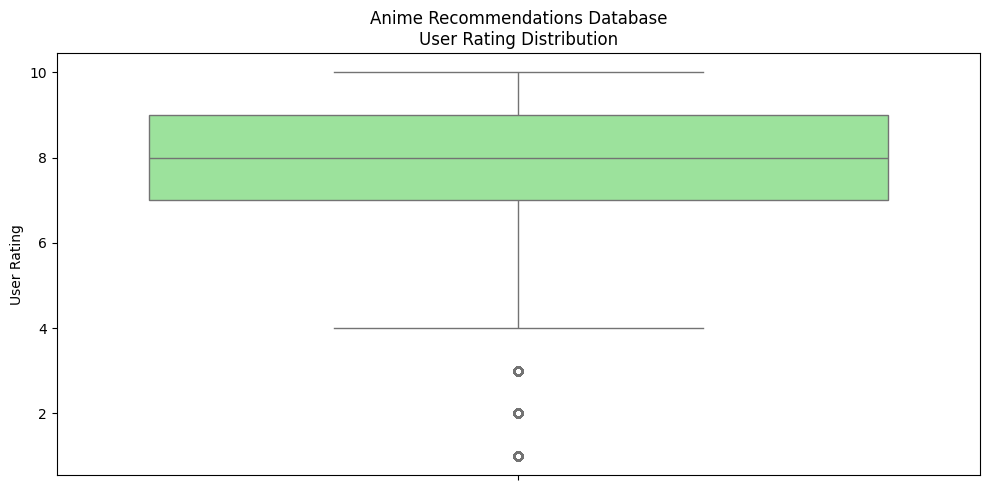

In [146]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=cu_rating_df["rating"], color="lightgreen")
plt.title('Anime Recommendations Database\nUser Rating Distribution')
plt.ylabel('User Rating')

plt.tight_layout()
plt.savefig(f"{plots_location}\\anime_recommendations_database\\user_rating_distribution.png")
plt.show()

There are no more missing values.

### Anime Recommendations Database 2020

#### Anime Listing

First thing to do is to drop the scores features as it contains a lot of unknowns and they will not be used in the recommendation models.

In [147]:
hernanAnime = pd.read_csv("E:\\applied data science capstone\\data\\hernan4444\\archive\\anime-hernan.csv")
hernan_anime_df = hernanAnime.drop(columns=["Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", 
                                "Score-4", "Score-3", "Score-2", "Score-1", "Score"])

Removing the numeric columns that will not be used in the recommendation system as well as the Ranked column.

In [148]:
hernan_anime_df = hernan_anime_df.drop(columns=["Popularity", "Members", "Favorites", "Watching", "Completed", "On-Hold", 
                                                "Dropped", "Plan to Watch", "Ranked"])

Rename the MAL_ID field to anime_id to make it easier to remove duplicate animes from the combined dataset in the future.

In [149]:
hernan_anime_df = hernan_anime_df.rename(columns={"MAL_ID": "anime_id"})

Next is to remove the types that will provide no value. We will restrict the types to Tv, movie and unknown.

In [150]:
hernan_anime_df = hernan_anime_df[hernan_anime_df["Type"].isin(["TV", "Movie", "Unknown"])]
type_df = hernan_anime_df["Type"].value_counts().to_frame()
type_df = type_df.reset_index()
fig = px.treemap(type_df, path=['Type'], values='count', title="Type Distribution")
fig.show()

Unknown is a very small category with just 37. These may still be resolved once the datasets are combined.

Removing the English Name and Japanese Name columns. The name column can be used to determine the name of the anime. Also dropping the aired column.

In [151]:
hernan_anime_df = hernan_anime_df.drop(columns=["English name", "Japanese name", "Aired"])

Removing the adult content

In [152]:
hernan_anime_df = hernan_anime_df[~hernan_anime_df["Genres"].str.contains(r"(H|h)entai")]

C:\Users\Asus-Home\AppData\Local\Temp\ipykernel_16148\1558220493.py:1: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Converting the duration to minutes

In [153]:
hernan_anime_df["Duration"] = hernan_anime_df["Duration"].apply(lambda x: x.replace(" per ep.", ""))

In [154]:
import numpy as np
def convert_duration_to_seconds(duration):
    if duration == "Unknown":
        return np.nan
    
    timeSplits = duration.split('.')
    seconds = 0
    
    for segment in timeSplits:
        segment = segment.strip()
        if 'sec' in segment:
            seconds += int(segment.split(' ')[0].strip())
        elif 'min' in segment:
            seconds += int(segment.split(' ')[0].strip()) * 60
        elif 'hr' in segment:
            seconds += int(segment.split(' ')[0].strip()) * 60 * 60
    
    return seconds

In [155]:
hernan_anime_df["duration_in_minutes"] = hernan_anime_df["Duration"].apply(lambda x: convert_duration_to_seconds(x) / 60)
hernan_anime_df = hernan_anime_df.drop(columns=["Duration"])

duration_df = hernan_anime_df["duration_in_minutes"].value_counts().to_frame()
duration_df = duration_df.reset_index()
fig = px.treemap(duration_df, path=['duration_in_minutes'], values='count', title="Duration Distribution")
fig.show()

Removing anime that are potentially music videos. Anime usually have a length of 23 minutes, anything below that is non-standard and has been removed if its genre is also music

In [156]:
hernan_anime_df = hernan_anime_df[~((hernan_anime_df["Genres"] == "Music") \
    & (hernan_anime_df["duration_in_minutes"] < 20))]

hernan_anime_df.loc[hernan_anime_df["Type"] == "Unknown", ["Type"]] = None
hernan_anime_df.loc[hernan_anime_df["Genres"] == "Unknown", ["Genres"]] = None
hernan_anime_df.loc[hernan_anime_df["Premiered"] == "Unknown", ["Premiered"]] = None
hernan_anime_df.loc[hernan_anime_df["Producers"] == "Unknown", ["Producers"]] = None
hernan_anime_df.loc[hernan_anime_df["Licensors"] == "Unknown", ["Licensors"]] = None
hernan_anime_df.loc[hernan_anime_df["Studios"] == "Unknown", ["Studios"]] = None
hernan_anime_df.loc[hernan_anime_df["Source"] == "Unknown", ["Source"]] = None
hernan_anime_df.loc[hernan_anime_df["Rating"] == "Unknown", ["Rating"]] = None

hernan_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8040 entries, 0 to 17561
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             8040 non-null   int64  
 1   Name                 8040 non-null   object 
 2   Genres               7988 non-null   object 
 3   Type                 8003 non-null   object 
 4   Episodes             8040 non-null   object 
 5   Premiered            4739 non-null   object 
 6   Producers            4958 non-null   object 
 7   Licensors            2666 non-null   object 
 8   Studios              5752 non-null   object 
 9   Source               6443 non-null   object 
 10  Rating               7585 non-null   object 
 11  duration_in_minutes  7647 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 816.6+ KB


#### Synopsis Data

In [157]:
synopsis_df = pd.read_csv("E:\\applied data science capstone\\data\\hernan4444\\archive\\anime_with_synopsis.csv")
synopsis_df = synopsis_df.drop(columns=["Score"])
synopsis_df = synopsis_df.rename(columns={"MAL_ID": "anime_id", "sypnopsis": "synopsis"})

Fill the unknown synopsis with na so as to enable filling of missing values in the future

In [158]:
synopsis_df.loc[synopsis_df["synopsis"].str.contains("No synopsis", na=False), "synopsis"] = np.nan
synopsis_df.describe(include=object)

,Name,Genres,synopsis
count,16214,16214,15461
unique,16210,4857,15218
top,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Music,Furukawa Taku film.
freq,3,790,13


In [159]:
synopsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  16214 non-null  int64 
 1   Name      16214 non-null  object
 2   Genres    16214 non-null  object
 3   synopsis  15461 non-null  object
dtypes: int64(1), object(3)
memory usage: 506.8+ KB


### MyAnimeList Comment Dataset V2

#### Anime Listing

Remove the id and jpName columns as well as consolidate the anime title column

In [160]:
natleeAnime = pd.read_csv("E:\\applied data science capstone\\data\\natlee\\archive\\anime_list.csv")
natlee_anime_df = natleeAnime.drop(columns=["id", "jpName", "score", "scoredByUser", "aired"])

natlee_anime_df["title"] = natlee_anime_df["engName"]
natlee_anime_df["title"] = natlee_anime_df["title"].fillna(natlee_anime_df["synonymsName"])
natlee_anime_df = natlee_anime_df.dropna(subset=["title"])
natlee_anime_df = natlee_anime_df.drop(columns=["engName", "synonymsName"])

Convert the episodes column to a numeric feature

In [161]:
natlee_anime_df["episodes"] = pd.to_numeric(natlee_anime_df["episodes"], errors='coerce')

Standardize the missing values

In [162]:
natlee_anime_df.loc[natlee_anime_df["producer"] == "add some", "producer"] = None
natlee_anime_df.loc[natlee_anime_df["licensors"] == "add some", "licensors"] = None
natlee_anime_df.loc[natlee_anime_df["studios"] == "add some", "studios"] = None
natlee_anime_df.loc[natlee_anime_df["source"] == "Unknown", "source"] = None

Remove all types except for movie and tv

In [163]:
natlee_anime_df = natlee_anime_df[natlee_anime_df["workType"].isin(["TV", "Movie"])]

Remove adult content

In [164]:
natlee_anime_df["genres"] = natlee_anime_df["genres"].astype(str)
natlee_anime_df = natlee_anime_df[~natlee_anime_df["genres"].str.contains(r"(H|h)entai")]

C:\Users\Asus-Home\AppData\Local\Temp\ipykernel_16148\2037110495.py:2: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Convert duration to minutes

In [165]:
natlee_anime_df["duration_in_minutes"] = natlee_anime_df["duration"] \
    .apply(lambda x: convert_duration_to_seconds(x) / 60)

Remove unused columns

In [166]:
natlee_anime_df = natlee_anime_df.drop(columns=["popularityRank", "allRank", "members", "favorites", "lastUpdate", "duration"])
natlee_anime_df = natlee_anime_df.rename(columns={"workId": "anime_id", "workType": "type"})

natlee_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8649 entries, 0 to 24588
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             8649 non-null   int64  
 1   url                  8649 non-null   object 
 2   type                 8649 non-null   object 
 3   episodes             8452 non-null   float64
 4   status               8649 non-null   object 
 5   premiered            4588 non-null   object 
 6   producer             4987 non-null   object 
 7   broadcast            5297 non-null   object 
 8   licensors            2857 non-null   object 
 9   studios              6032 non-null   object 
 10  genres               8649 non-null   object 
 11  themes               4986 non-null   object 
 12  demographic          3774 non-null   object 
 13  source               7277 non-null   object 
 14  rating               8392 non-null   object 
 15  title                8649 non-null   objec

### Combining datasets

#### Anime Listing

##### Combining natlee and cooper

In [167]:
temp_merged_anime_df = natlee_anime_df.merge(cu_anime_df, \
    how="outer", on="anime_id", suffixes=("_nat", "_coop"))

temp_merged_anime_df["title"] = temp_merged_anime_df["title"] \
    .fillna(temp_merged_anime_df["name"])
temp_merged_anime_df["type_nat"] = temp_merged_anime_df["type_nat"] \
    .fillna(temp_merged_anime_df["type_coop"])
temp_merged_anime_df["episodes_nat"] = temp_merged_anime_df["episodes_nat"] \
    .fillna(temp_merged_anime_df["episodes_coop"])
temp_merged_anime_df["genres"] = temp_merged_anime_df["genres"] \
    .fillna(temp_merged_anime_df["genre"])

temp_merged_anime_df = temp_merged_anime_df.drop(columns=["name", "type_coop", \
    "episodes_coop", "genre", "members"])
temp_merged_anime_df = temp_merged_anime_df.rename(columns={"type_nat": "type", \
    "episodes_nat": "episodes"})

##### Combining hernan and the combined dataset

In [168]:
merged_anime_df = temp_merged_anime_df.merge(hernan_anime_df, how="outer", \
    on="anime_id", suffixes=("_orig", "_hern"))

merged_anime_df["title"] = merged_anime_df["title"].fillna(merged_anime_df["Name"])
merged_anime_df["type"] = merged_anime_df["type"].fillna(merged_anime_df["Type"])
merged_anime_df["episodes"] = merged_anime_df["episodes"].fillna(merged_anime_df["Episodes"])
merged_anime_df["premiered"] = merged_anime_df["premiered"].fillna(merged_anime_df["Premiered"])
merged_anime_df["producer"] = merged_anime_df["producer"].fillna(merged_anime_df["Producers"])
merged_anime_df["licensors"] = merged_anime_df["licensors"].fillna(merged_anime_df["Licensors"])
merged_anime_df["studios"] = merged_anime_df["studios"].fillna(merged_anime_df["Studios"])
merged_anime_df["genres"] = merged_anime_df["genres"].fillna(merged_anime_df["Genres"])
merged_anime_df["source"] = merged_anime_df["source"].fillna(merged_anime_df["Source"])
merged_anime_df["rating"] = merged_anime_df["rating"].fillna(merged_anime_df["Rating"])
merged_anime_df["duration_in_minutes_orig"] = merged_anime_df["duration_in_minutes_orig"] \
    .fillna(merged_anime_df["duration_in_minutes_hern"])

merged_anime_df = merged_anime_df.drop(columns=["Name", "Type", "Episodes", "Premiered", "Producers", 
                                                          "Licensors", "Studios", "Genres", "Source", "Rating", "duration_in_minutes_hern"])
merged_anime_df = merged_anime_df.rename(columns={"duration_in_minutes_orig": "duration_in_minutes"})

merged_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10062 entries, 0 to 10061
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             10062 non-null  int64  
 1   url                  8649 non-null   object 
 2   type                 10040 non-null  object 
 3   episodes             9902 non-null   object 
 4   status               8649 non-null   object 
 5   premiered            5295 non-null   object 
 6   producer             5732 non-null   object 
 7   broadcast            5297 non-null   object 
 8   licensors            3009 non-null   object 
 9   studios              6802 non-null   object 
 10  genres               10035 non-null  object 
 11  themes               4986 non-null   object 
 12  demographic          3774 non-null   object 
 13  source               8252 non-null   object 
 14  rating               9622 non-null   object 
 15  title                10062 non-null 

##### Combining synopsis data

In [169]:
anime_with_synopsis_df = merged_anime_df.merge(synopsis_df, how="left", \
    on="anime_id", suffixes=("_orig", "_syn"))
anime_with_synopsis_df["genres"] = anime_with_synopsis_df["genres"] \
    .fillna(anime_with_synopsis_df["Genres"])
anime_with_synopsis_df = anime_with_synopsis_df.drop(columns=["Name", "Genres"])

anime_with_synopsis_df.describe(include=object)

,url,type,episodes,status,premiered,producer,broadcast,licensors,studios,genres,themes,demographic,source,rating,title,synopsis
count,8649,10040,9902.0,8649,5295,5732,5297,3009,6802,10061,4986,3774,8252,9622,10062,7690
unique,8649,2,299.0,3,241,3267,525,212,843,1222,596,5,17,5,9937,7544
top,https://myanimelist.net/anime/1/Cowboy_Bebop,TV,1.0,Finished Airing,Spring 2017,NHK,Unknown,Funimation,Toei Animation,nan,Historical,Kids,Original,PG-13 - Teens 13 or older,Butt Detective,Furukawa Taku film.
freq,1,6079,3271.0,8360,87,130,2375,719,560,900,351,1913,3351,3736,7,13


In [170]:
anime_with_synopsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10062 entries, 0 to 10061
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             10062 non-null  int64  
 1   url                  8649 non-null   object 
 2   type                 10040 non-null  object 
 3   episodes             9902 non-null   object 
 4   status               8649 non-null   object 
 5   premiered            5295 non-null   object 
 6   producer             5732 non-null   object 
 7   broadcast            5297 non-null   object 
 8   licensors            3009 non-null   object 
 9   studios              6802 non-null   object 
 10  genres               10061 non-null  object 
 11  themes               4986 non-null   object 
 12  demographic          3774 non-null   object 
 13  source               8252 non-null   object 
 14  rating               9622 non-null   object 
 15  title                10062 non-null 

There are still considerable missing data. The unofficial api will be used to gather additional information for the missing data.  See additional-synopsis.py in appendix for code used to retrieve the additional synopsis data.  
The data will be retrieved from the csv file it was stored in.

In [171]:
anime_with_synopsis_df.to_csv("E:\\applied data science capstone\\data\\documentation\\anime_with_synopsis.csv", index=False)

##### Additional Synopsis

In [172]:
additional_synopsis_df = pd.read_csv("E:\\applied data science capstone\\data\\combined\\anime_with_missing_synopses.csv")
additional_synopsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mal_id        5283 non-null   int64  
 1   url           5283 non-null   object 
 2   title         5283 non-null   object 
 3   type          5276 non-null   object 
 4   source        5283 non-null   object 
 5   episodes      5223 non-null   float64
 6   status        5283 non-null   object 
 7   premiered     5180 non-null   object 
 8   duration      5283 non-null   object 
 9   rating        5200 non-null   object 
 10  synopsis      3418 non-null   object 
 11  broadcast     1217 non-null   object 
 12  producers     2204 non-null   object 
 13  licensors     686 non-null    object 
 14  studios       2872 non-null   object 
 15  genres        4131 non-null   object 
 16  themes        2487 non-null   object 
 17  demographics  1792 non-null   object 
dtypes: float64(1), int64(1), obj

In [173]:
additional_synopsis_df = additional_synopsis_df.rename(columns={"mal_id": "anime_id"})
combined_synopsis_df = anime_with_synopsis_df.merge(additional_synopsis_df, how="left", on="anime_id", suffixes=("_orig", "_add"))
combined_synopsis_df["synopsis_orig"] = combined_synopsis_df["synopsis_orig"].fillna(combined_synopsis_df["synopsis_add"])
combined_synopsis_df.loc[combined_synopsis_df["synopsis_orig"].str.contains("No synopsis") 
                         & ~combined_synopsis_df["synopsis_orig"].isna(), "synopsis_orig"] = None

Fill in missing data where possible

In [174]:
combined_synopsis_df["url_orig"] = combined_synopsis_df["url_orig"] \
    .fillna(combined_synopsis_df["url_add"])
combined_synopsis_df["episodes_orig"] = combined_synopsis_df["episodes_orig"] \
    .fillna(combined_synopsis_df["episodes_add"])
combined_synopsis_df["status_orig"] = combined_synopsis_df["status_orig"] \
    .fillna(combined_synopsis_df["status_add"])
combined_synopsis_df["premiered_orig"] = combined_synopsis_df["premiered_orig"] \
    .fillna(combined_synopsis_df["premiered_add"])
combined_synopsis_df["broadcast_orig"] = combined_synopsis_df["broadcast_orig"] \
    .fillna(combined_synopsis_df["broadcast_add"])
combined_synopsis_df["licensors_orig"] = combined_synopsis_df["licensors_orig"] \
    .fillna(combined_synopsis_df["licensors_add"])
combined_synopsis_df["studios_orig"] = combined_synopsis_df["studios_orig"] \
    .fillna(combined_synopsis_df["studios_add"])
combined_synopsis_df["genres_orig"] = combined_synopsis_df["genres_orig"] \
    .fillna(combined_synopsis_df["genres_add"])
combined_synopsis_df["themes_orig"] = combined_synopsis_df["themes_orig"] \
    .fillna(combined_synopsis_df["themes_add"])
combined_synopsis_df["source_orig"] = combined_synopsis_df["source_orig"] \
    .fillna(combined_synopsis_df["source_add"])
combined_synopsis_df["rating_orig"] = combined_synopsis_df["rating_orig"] \
    .fillna(combined_synopsis_df["rating_add"])
combined_synopsis_df["producer"] = combined_synopsis_df["producer"] \
    .fillna(combined_synopsis_df["producers"])
combined_synopsis_df["demographic"] = combined_synopsis_df["demographic"] \
    .fillna(combined_synopsis_df["demographics"])

combined_synopsis_df[combined_synopsis_df["synopsis_orig"].isna()].head()

,anime_id,url_orig,type_orig,episodes_orig,status_orig,premiered_orig,producer,broadcast_orig,licensors_orig,studios_orig,...,duration,rating_add,synopsis_add,broadcast_add,producers,licensors_add,studios_add,genres_add,themes_add,demographics
1266,2265,NaN,Movie,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1267,2268,NaN,TV,98,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,2626,https://myanimelist.net/anime/2626/The%E2%98%8...,Movie,1.0,Finished Airing,1998-03-07T00:00:00+00:00,NaN,NaN,NaN,Shin-Ei Animation,...,16 min,PG - Children,NaN,NaN,NaN,NaN,Shin-Ei Animation,Fantasy,NaN,NaN
1423,2628,https://myanimelist.net/anime/2628/The%E2%98%8...,Movie,1.0,Finished Airing,1999-03-06T00:00:00+00:00,NaN,NaN,NaN,Shin-Ei Animation,...,16 min,PG - Children,NaN,NaN,NaN,NaN,Shin-Ei Animation,Fantasy,NaN,NaN
1425,2633,https://myanimelist.net/anime/2633/The%E2%98%8...,Movie,1.0,Finished Airing,2000-03-11T00:00:00+00:00,NaN,NaN,NaN,Shin-Ei Animation,...,17 min,PG - Children,NaN,NaN,NaN,NaN,Shin-Ei Animation,"Adventure, Comedy, Fantasy, Sci-Fi",NaN,"Kids, Shounen"


Filling in the missing data for Doraemon

In [175]:
combined_synopsis_df.loc[combined_synopsis_df["title_orig"].str.contains("Doraemon") \
    & combined_synopsis_df["synopsis_orig"].isna(), "synopsis_orig"] = "Another entry in the Doraemon media franchise"
combined_synopsis_df[combined_synopsis_df["synopsis_orig"].isna()].head()

,anime_id,url_orig,type_orig,episodes_orig,status_orig,premiered_orig,producer,broadcast_orig,licensors_orig,studios_orig,...,duration,rating_add,synopsis_add,broadcast_add,producers,licensors_add,studios_add,genres_add,themes_add,demographics
1266,2265,NaN,Movie,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1267,2268,NaN,TV,98,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1426,2636,https://myanimelist.net/anime/2636/Dorami-chan...,Movie,1.0,Finished Airing,1991-03-09T00:00:00+00:00,NaN,NaN,NaN,Shin-Ei Animation,...,40 min,G - All Ages,NaN,NaN,NaN,NaN,Shin-Ei Animation,Fantasy,NaN,NaN
1428,2642,https://myanimelist.net/anime/2642/Dorami-chan...,Movie,1.0,Finished Airing,1994-03-12T00:00:00+00:00,NaN,NaN,NaN,Shin-Ei Animation,...,15 min,G - All Ages,NaN,NaN,NaN,NaN,Shin-Ei Animation,Fantasy,NaN,Kids
1474,2701,https://myanimelist.net/anime/2701/Susie-chan_...,TV,104.0,Finished Airing,Spring 1999,Shogakukan Productions,Unknown,NaN,Xebec,...,15 min per ep,NaN,NaN,Unknown,Shogakukan Productions,NaN,Xebec,Comedy,NaN,Kids


Filling in the missing data for Dorami-chan

In [176]:
combined_synopsis_df.loc[combined_synopsis_df["title_orig"].str.contains("Dorami-chan") \
    & combined_synopsis_df["synopsis_orig"].isna(), "synopsis_orig"] = "Another entry in the Dorami-chan media franchise"
combined_synopsis_df[combined_synopsis_df["synopsis_orig"].isna()].head()

,anime_id,url_orig,type_orig,episodes_orig,status_orig,premiered_orig,producer,broadcast_orig,licensors_orig,studios_orig,...,duration,rating_add,synopsis_add,broadcast_add,producers,licensors_add,studios_add,genres_add,themes_add,demographics
1266,2265,NaN,Movie,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1267,2268,NaN,TV,98,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474,2701,https://myanimelist.net/anime/2701/Susie-chan_...,TV,104.0,Finished Airing,Spring 1999,Shogakukan Productions,Unknown,NaN,Xebec,...,15 min per ep,NaN,NaN,Unknown,Shogakukan Productions,NaN,Xebec,Comedy,NaN,Kids
1481,2708,https://myanimelist.net/anime/2708/Wankorobee,TV,26,Finished Airing,Fall 1996,NaN,Sundays at 10:30 (JST),NaN,"Ajia-Do, TMS Entertainment",...,15 min per ep,G - All Ages,NaN,Sundays at 10:30 (JST),NaN,NaN,"Ajia-do, TMS Entertainment","Comedy, Fantasy",NaN,Kids
1591,2930,https://myanimelist.net/anime/2930/Tensai_Dr_H...,TV,12,Finished Airing,Fall 2007,"Trans Arts, Tohokushinsha Film Corporation",Unknown,NaN,Production I.G,...,23 min per ep,G - All Ages,No synopsis has been added for this series yet...,Unknown,"Production I.G, Tohokushinsha Film Corporation",NaN,Trans Arts,Comedy,NaN,NaN


In [177]:
combined_synopsis_df.loc[combined_synopsis_df["title_orig"].str.contains("Cynical Hysterie Hour"), \
    ["anime_id", "title_orig", "synopsis_orig" ,"synopsis_add"]]

,anime_id,title_orig,synopsis_orig,synopsis_add
2567,6759,Cynical Hysterie Hour: Trip Coaster,None,No synopsis has been added for this series yet...
2568,6760,Cynical Hysterie Hour: Ch Ch Ch Change,None,No synopsis has been added for this series yet...
2569,6761,Cynical Hysterie Hour: Through the Night,None,No synopsis has been added for this series yet...
2570,6762,Cynical Hysterie Hour: Utakata no Uta,None,No synopsis has been added for this series yet...


In [178]:
combined_synopsis_df.loc[combined_synopsis_df["title_orig"].str.contains("Cynical Hysterie Hour") \
    & combined_synopsis_df["synopsis_orig"].isna(), "synopsis_orig"] = "'Selfish, mean and manipulative'. These are some of the words that people use about Tsuneko. But Tsuneko herself has no doubt that she is the most popular person in her elementary school class. Her best friends are Kiriko, the calm one, Hanako, the little madam, Nono, the cutie, Shee, the firm one, and Tsunta, the punk. These stories of their day-to-day lives are full of delightful observations about being a child and growing up in Japan."
combined_synopsis_df.loc[combined_synopsis_df["title_orig"].str.contains("Pleasant Goat and Big Big Wolf") & \
    combined_synopsis_df["synopsis_orig"].isna(), ["anime_id", "title_orig", "synopsis_orig", "synopsis_add"]].head()

,anime_id,title_orig,synopsis_orig,synopsis_add
8299,43983,Pleasant Goat and Big Big Wolf: Joys of Seasons,NaN,NaN
8300,43984,Pleasant Goat and Big Big Wolf: Smart Dodging,NaN,NaN
8301,43985,"Pleasant Goat and Big Big Wolf: Happy, Happy, ...",NaN,NaN
8302,43986,Pleasant Goat and Big Big Wolf: The Athletic C...,NaN,NaN
8303,43987,Pleasant Goat and Big Big Wolf: The Happy Diary,NaN,NaN


In [179]:
combined_synopsis_df.loc[combined_synopsis_df["title_orig"].str.contains("Pleasant Goat and Big Big Wolf") & \
    combined_synopsis_df["synopsis_orig"].isna(), "synopsis_orig"] = "Another entry in the Pleasant Goat and Big Big Wolf franchise"
combined_synopsis_df = combined_synopsis_df[~combined_synopsis_df["synopsis_orig"].isna()]
combined_synopsis_df = combined_synopsis_df.drop(columns=["url_add", "title_add", "type_add", "source_add", "episodes_add", "status_add", \
    "premiered_add", "duration", "rating_add", "synopsis_add", "broadcast_add", "producers", \
        "licensors_add", "studios_add", "genres_add", "themes_add", "demographics"])

name_map = { col:col.split("_")[0] for col in combined_synopsis_df.columns if len(col.split("_")) > 1 \
    and col.split("_")[1] == "orig"}
combined_synopsis_df = combined_synopsis_df.rename(columns=name_map)

combined_synopsis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8759 entries, 0 to 10061
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             8759 non-null   int64  
 1   url                  7569 non-null   object 
 2   type                 8743 non-null   object 
 3   episodes             8748 non-null   object 
 4   status               7569 non-null   object 
 5   premiered            5773 non-null   object 
 6   producer             5721 non-null   object 
 7   broadcast            4688 non-null   object 
 8   licensors            3080 non-null   object 
 9   studios              6578 non-null   object 
 10  genres               8759 non-null   object 
 11  themes               4685 non-null   object 
 12  demographic          2891 non-null   object 
 13  source               7488 non-null   object 
 14  rating               8500 non-null   object 
 15  title                8759 non-null   objec

Store anime_id of anime with missing data to retrieve additional information from the API

In [180]:
missingAnime = combined_synopsis_df.loc[combined_synopsis_df["url"].isna(), "anime_id"].to_list()
missingAnime = combined_synopsis_df.loc[combined_synopsis_df["type"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["episodes"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["status"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["premiered"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["producer"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["broadcast"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["licensors"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["studios"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["genres"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["themes"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["demographic"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["source"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["rating"].isna(), "anime_id"].to_list()
missingAnime += combined_synopsis_df.loc[combined_synopsis_df["duration_in_minutes"].isna(), "anime_id"] \
    .to_list()

missingAnime = list(set(missingAnime))
missingAnime = pd.Series(missingAnime, name="anime_id")

missingAnime.to_csv("E:\\applied data science capstone\\data\\combined\\anime_with_missing_data_11_Jun.csv", \
    index=False)

Used contents in **anime-narrowing/anime-reduced.py** to retrieve the missing data from the API

In [181]:
additional_anime_data_df = pd.read_csv("E:\\applied data science capstone\\data\\combined\\anime-data-12-Jun\\anime_list_12_Jun.csv")
additional_anime_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mal_id        8636 non-null   int64  
 1   url           8636 non-null   object 
 2   title         8636 non-null   object 
 3   type          8635 non-null   object 
 4   source        8636 non-null   object 
 5   episodes      8586 non-null   float64
 6   status        8636 non-null   object 
 7   premiered     8606 non-null   object 
 8   duration      8636 non-null   object 
 9   rating        8484 non-null   object 
 10  synopsis      8605 non-null   object 
 11  broadcast     5269 non-null   object 
 12  producers     5694 non-null   object 
 13  licensors     3195 non-null   object 
 14  studios       6834 non-null   object 
 15  genres        8066 non-null   object 
 16  themes        5357 non-null   object 
 17  demographics  3251 non-null   object 
dtypes: float64(1), int64(1), obj

In [182]:
additional_anime_data_df = additional_anime_data_df.rename(columns={"mal_id": "anime_id"})

merged_df = combined_synopsis_df.merge(additional_anime_data_df, how="left", \
    on="anime_id", suffixes=("", "_add"))

merged_df["url"] = merged_df["url"].fillna(merged_df["url_add"])
merged_df["type"] = merged_df["type"].fillna(merged_df["type_add"])
merged_df["source"] = merged_df["source"].fillna(merged_df["source_add"])
merged_df["episodes"] = merged_df["episodes"].fillna(merged_df["episodes_add"])
merged_df["status"] = merged_df["status"].fillna(merged_df["status_add"])
merged_df["premiered"] = merged_df["premiered"].fillna(merged_df["premiered_add"])
merged_df["producer"] = merged_df["producer"].fillna(merged_df["producers"])
merged_df["broadcast"] = merged_df["broadcast"].fillna(merged_df["broadcast_add"])
merged_df["licensors"] = merged_df["licensors"].fillna(merged_df["licensors_add"])
merged_df["studios"] = merged_df["studios"].fillna(merged_df["studios_add"])
merged_df["genres"] = merged_df["genres"].fillna(merged_df["genres_add"])
merged_df["themes"] = merged_df["themes"].fillna(merged_df["themes_add"])
merged_df["demographic"] = merged_df["demographic"].fillna(merged_df["demographics"])
merged_df["rating"] = merged_df["rating"].fillna(merged_df["rating_add"])
merged_df["duration_in_minutes"] = merged_df["duration_in_minutes"].fillna(merged_df["duration"])

merged_df = merged_df.drop(columns=["url_add", "title_add", "type_add", "source_add", "episodes_add", "status_add", \
    "premiered_add", "duration", "rating_add", "synopsis_add", "broadcast_add", "producers", \
        "licensors_add", "studios_add", "genres_add", "themes_add", "demographics"])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   anime_id             8759 non-null   int64 
 1   url                  8646 non-null   object
 2   type                 8743 non-null   object
 3   episodes             8748 non-null   object
 4   status               8646 non-null   object
 5   premiered            8636 non-null   object
 6   producer             5956 non-null   object
 7   broadcast            5310 non-null   object
 8   licensors            3220 non-null   object
 9   studios              6908 non-null   object
 10  genres               8759 non-null   object
 11  themes               5424 non-null   object
 12  demographic          3370 non-null   object
 13  source               8738 non-null   object
 14  rating               8562 non-null   object
 15  title                8759 non-null   object
 16  durati

In [183]:
missing_placeholder = "Unknown"
merged_df["url"] = merged_df["url"].fillna(missing_placeholder)

merged_df["status"].value_counts()

status
Finished Airing     8363
Not yet aired        197
Currently Airing      86
Name: count, dtype: int64

In [184]:
merged_df = merged_df.loc[~merged_df["status"].isin(["Not yet aired"]), :]

Remove the not yet aired anime as they would not have been rated

In [185]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def convert_duration_to_seconds(duration):
    if duration is None:
        return 0
    
    if is_number(duration):
        return float(duration) * 60
    
    timeSplits = duration.split('.')
    seconds = 0
    
    for segment in timeSplits:
        segment = segment.strip()
        if 'sec' in segment:
            seconds += int(segment.split(' ')[0].strip())
        elif 'min' in segment:
            seconds += int(segment.split(' ')[0].strip()) * 60
        elif 'hr' in segment:
            seconds += int(segment.split(' ')[0].strip()) * 60 * 60
    
    return seconds

Convert duration of new anime to minutes using function defined above

In [186]:
merged_df["duration_in_minutes"] = merged_df["duration_in_minutes"] \
    .apply(lambda x: convert_duration_to_seconds(x) / 60)

Take a look at anime with a duration less than 20 minutes

In [187]:
merged_df.loc[merged_df["duration_in_minutes"] < 20, :].head()

,anime_id,url,type,episodes,status,premiered,producer,broadcast,licensors,studios,genres,themes,demographic,source,rating,title,duration_in_minutes,synopsis
83,112,https://myanimelist.net/anime/112/Chou_Henshin...,TV,8.0,Finished Airing,Winter 2004,m.o.e.,Unknown,NaN,"Imagin, Studio Live","Action, Adventure, Comedy, Fantasy, Sci-Fi, Ecchi",Super Power,NaN,Original,PG-13 - Teens 13 or older,The Cosmopolitan Prayers,17.0,Koto unknowingly seals away the Sun Goddess Am...
85,114,https://myanimelist.net/anime/114/Sakigake_Cro...,TV,26.0,Finished Airing,Fall 2003,TV Tokyo Music,Fridays at 01:00 (JST),"ADV Films, Sentai Filmworks, Discotek Media",Production I.G,Comedy,"Delinquents, Gag Humor, School",Shounen,Manga,PG-13 - Teens 13 or older,Cromartie High School,12.0,Takashi Kamiyama is your typical mild-mannered...
88,119,https://myanimelist.net/anime/119/Final_Approach,TV,13,Finished Airing,Fall 2004,Trinet Entertainment,Unknown,NaN,Zexcs,"Comedy, Drama, Romance, Slice of Life",NaN,NaN,Visual novel,PG-13 - Teens 13 or older,Final Approach,14.0,"Ever since their parents died a few years ago,..."
151,197,https://myanimelist.net/anime/197/Rizelmine,TV,24,Finished Airing,Spring 2002,m.o.e.,Unknown,NaN,"Madhouse, Imagin","Comedy, Ecchi, Romance, School, Sci-Fi",School,NaN,Manga,R+ - Mild Nudity,Rizelmine,15.0,Iwaki Tomonori is an average 15-year-old boy w...
172,231,https://myanimelist.net/anime/231/Asagiri_no_Miko,TV,26.0,Finished Airing,Summer 2002,"Starchild Records, TV Tokyo Music, Shounen Gah...",Unknown,"Media Blasters, NYAV Post","Chaos Project, GANSIS","Action, Comedy, Fantasy, Supernatural",Mythology,Seinen,Manga,PG - Children,Shrine of the Morning Mist,12.0,"Since childhood, Tadahiro Amatsu has two diffe..."


Removed them because anime have a standard duration of about 20 minutes

In [188]:
merged_df = merged_df.loc[merged_df["duration_in_minutes"] >= 20, :]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6085 entries, 0 to 8749
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             6085 non-null   int64  
 1   url                  6085 non-null   object 
 2   type                 6085 non-null   object 
 3   episodes             6084 non-null   object 
 4   status               6056 non-null   object 
 5   premiered            6055 non-null   object 
 6   producer             4673 non-null   object 
 7   broadcast            3954 non-null   object 
 8   licensors            3023 non-null   object 
 9   studios              5471 non-null   object 
 10  genres               6085 non-null   object 
 11  themes               4299 non-null   object 
 12  demographic          2530 non-null   object 
 13  source               6077 non-null   object 
 14  rating               5973 non-null   object 
 15  title                6085 non-null   object

In [189]:
merged_df.loc[merged_df["episodes"] == "Unknown", "episodes"] = None
merged_df[merged_df["episodes"].isna()].head()

,anime_id,url,type,episodes,status,premiered,producer,broadcast,licensors,studios,genres,themes,demographic,source,rating,title,duration_in_minutes,synopsis
11,21,https://myanimelist.net/anime/21/One_Piece,TV,None,Currently Airing,Fall 1999,"Fuji TV, TAP, Shueisha",Sundays at 09:30 (JST),"Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Fantasy",NaN,Shounen,Manga,PG-13 - Teens 13 or older,One Piece,24.0,"Gol D. Roger was known as the ""Pirate King,"" t..."
176,235,https://myanimelist.net/anime/235/Detective_Conan,TV,None,Currently Airing,Winter 1996,"Yomiuri Telecasting, TMS-Kyokuchi, Shogakukan",Saturdays at 18:00 (JST),"Funimation, Crunchyroll",TMS Entertainment,"Adventure, Comedy, Mystery",Detective,Shounen,Manga,PG-13 - Teens 13 or older,Case Closed,25.0,"Shinichi Kudou, a high school student of astou..."
644,966,https://myanimelist.net/anime/966/Crayon_Shin-...,TV,None,Currently Airing,Spring 1992,TV Asahi,Fridays at 19:30 (JST),Funimation,Shin-Ei Animation,"Comedy, Ecchi",School,Seinen,Manga,G - All Ages,Shin Chan,21.0,There is no such thing as an uneventful day in...
1114,1960,https://myanimelist.net/anime/1960/Sore_Ike_An...,TV,None,Currently Airing,Fall 1988,"Sotsu, Nippon Television Network",Fridays at 16:20 (JST),NaN,TMS Entertainment,"Comedy, Fantasy",NaN,Kids,Picture book,PG - Children,"Soreike! Anpanman, Go! Anpanman, Anpanman TV",24.0,"One night, a Star of Life falls down the chimn..."
1317,2406,https://myanimelist.net/anime/2406/Sazae-san,TV,None,Currently Airing,Fall 1969,Fuji TV,Sundays at 18:30 (JST),NaN,Eiken,"Comedy, Slice of Life",NaN,NaN,4-koma manga,G - All Ages,Mrs. Sazae,24.0,The main character is a mother named Sazae-san...


Handling missing episodes count

In [190]:
merged_df.loc[merged_df["anime_id"] == 21, "episodes"] = 1133
merged_df.loc[merged_df["anime_id"] == 235, "episodes"] = 1165
merged_df.loc[merged_df["anime_id"] == 966, "episodes"] = 1267
merged_df.loc[merged_df["anime_id"] == 1960, "episodes"] = 1700
merged_df.loc[merged_df["anime_id"] == 2406, "episodes"] = 2771
merged_df.loc[merged_df["anime_id"] == 6149, "episodes"] = 1468
merged_df.loc[merged_df["anime_id"] == 8687, "episodes"] = 837
merged_df.loc[merged_df["anime_id"] == 18941, "episodes"] = 321
merged_df.loc[merged_df["anime_id"] == 27783, "episodes"] = 0 # needs to be dropped
merged_df.loc[merged_df["anime_id"] == 31049, "episodes"] = 51
merged_df.loc[merged_df["anime_id"] == 32568, "episodes"] = 47
merged_df.loc[merged_df["anime_id"] == 32717, "episodes"] = 100
merged_df.loc[merged_df["anime_id"] == 33027, "episodes"] = 12
merged_df.loc[merged_df["anime_id"] == 33089, "episodes"] = 12
merged_df.loc[merged_df["anime_id"] == 33371, "episodes"] = 12
merged_df.loc[merged_df["anime_id"] == 33540, "episodes"] = 0 # needs to be dropped
merged_df.loc[merged_df["anime_id"] == 33737, "episodes"] = 28
merged_df.loc[merged_df["anime_id"] == 33839, "episodes"] = 0 # needs to be dropped
merged_df.loc[merged_df["anime_id"] == 34077, "episodes"] = 52
merged_df.loc[merged_df["anime_id"] == 34208, "episodes"] = 0 # needs to be dropped
merged_df.loc[merged_df["anime_id"] == 34289, "episodes"] = 13
merged_df.loc[merged_df["anime_id"] == 34338, "episodes"] = 0 # needs to be dropped
merged_df.loc[merged_df["anime_id"] == 34427, "episodes"] = 12
merged_df.loc[merged_df["anime_id"] == 34474, "episodes"] = 13
merged_df.loc[merged_df["anime_id"] == 34832, "episodes"] = 28 # needs to be dropped
merged_df.loc[merged_df["anime_id"] == 37008, "episodes"] = 13
merged_df.loc[merged_df["anime_id"] == 37096, "episodes"] = 339
merged_df.loc[merged_df["anime_id"] == 39725, "episodes"] = 12
merged_df.loc[merged_df["anime_id"] == 39893, "episodes"] = 56
merged_df.loc[merged_df["anime_id"] == 39905, "episodes"] = 1 # change type to movie
merged_df.loc[merged_df["anime_id"] == 40327, "episodes"] = 98
merged_df.loc[merged_df["anime_id"] == 40506, "episodes"] = 48
merged_df.loc[merged_df["anime_id"] == 40608, "episodes"] = 24
merged_df.loc[merged_df["anime_id"] == 40935, "episodes"] = 10
merged_df.loc[merged_df["anime_id"] == 41521, "episodes"] = 12
merged_df.loc[merged_df["anime_id"] == 42205, "episodes"] = 52
merged_df.loc[merged_df["anime_id"] == 42385, "episodes"] = 0 # needs to be removed
merged_df.loc[merged_df["anime_id"] == 43735, "episodes"] = 24
merged_df.loc[merged_df["anime_id"] == 43778, "episodes"] = 25
merged_df.loc[merged_df["anime_id"] == 44940, "episodes"] = 14
merged_df.loc[merged_df["anime_id"] == 45665, "episodes"] = 12
merged_df.loc[merged_df["anime_id"] == 46381, "episodes"] = 41
merged_df.loc[merged_df["anime_id"] == 47160, "episodes"] = 13
merged_df.loc[merged_df["anime_id"] == 48365, "episodes"] = 214
merged_df.loc[merged_df["anime_id"] == 48391, "episodes"] = 51
merged_df.loc[merged_df["anime_id"] == 48417, "episodes"] = 13
merged_df.loc[merged_df["anime_id"] == 48483, "episodes"] = 12
merged_df.loc[merged_df["anime_id"] == 53876, "episodes"] = 45

In [191]:
merged_df.loc[merged_df["anime_id"] == 27783, "episodes"] = 0 # needs to be dropped
merged_df = merged_df.loc[~merged_df["anime_id"].isin([27783, 33540, 33839, 34208, 34338, 34832, 42385]), :]
merged_df.loc[merged_df["anime_id"] == 39905, "type"] = "Movie"

Handling missing status

In [192]:
merged_df.loc[merged_df["status"].isna(), :].head()

,anime_id,url,type,episodes,status,premiered,producer,broadcast,licensors,studios,genres,themes,demographic,source,rating,title,duration_in_minutes,synopsis
265,342,Unknown,TV,13,NaN,Winter 2005,Geneon Universal Entertainment,NaN,Geneon Entertainment USA,J.C.Staff,"Drama, Military, Sci-Fi, Space",NaN,NaN,Light novel,PG-13 - Teens 13 or older,Starship Operators,24.0,For the 73rd class of cadets of the Defense Un...
515,760,Unknown,Movie,1,NaN,NaN,NaN,NaN,NaN,Madhouse,"Adventure, Drama, Martial Arts, Romance, Shoun...",NaN,NaN,Manga,R - 17+ (violence & profanity),Tenjou Tenge: The Past Chapter,92.0,suomi Takayanagi and Maya Natsume both want to...
675,1032,Unknown,Movie,1,NaN,NaN,Yomiko Advertising,NaN,Discotek Media,Studio Pierrot,"Adventure, Drama, Historical, Romance",NaN,NaN,Novel,G - All Ages,Kumo no You ni Kaze no You ni,80.0,"Ginga, a small town girl sets out to become th..."
859,1451,Unknown,Movie,1,NaN,NaN,NaN,NaN,Manga Entertainment,Production Reed,"Action, Historical, Supernatural, Thriller",NaN,NaN,Novel,R+ - Mild Nudity,Shuranosuke Zanmaken: Shikamamon no Otoko,49.0,Shurannosuke Sakaki is a masterless samurai wi...
957,1621,Unknown,Movie,1,NaN,NaN,NaN,NaN,NaN,Asahi Production,"Action, Comedy, School",NaN,NaN,Visual novel,PG-13 - Teens 13 or older,Haru no Ashioto The Movie: Ourin Dakkan,20.0,One day the else so peaceful mood in the Ourin...


In [193]:
merged_df.loc[merged_df["anime_id"] == 342, "status"] = "Finished Airing"
merged_df.loc[merged_df["anime_id"] == 760, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 1032, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 1451, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 1621, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 2691, "status"] = "Finished Airing" # to be dropped
merged_df.loc[merged_df["anime_id"] == 3258, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 4112, "status"] = "Finished Airing" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 5272, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 5673, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 7664, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 8149, "status"] = "Finished Airing"
merged_df.loc[merged_df["anime_id"] == 10330, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 10463, "status"] = "Finished Airing"
merged_df.loc[merged_df["anime_id"] == 13169, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 13171, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 13173, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 13175, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 19683, "status"] = "Finished Airing"
merged_df.loc[merged_df["anime_id"] == 33540, "status"] = "Finished Airing"
merged_df.loc[merged_df["anime_id"] == 35025, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 35210, "status"] = "Finished Airing" # to be dropped, not yet aired
merged_df.loc[merged_df["anime_id"] == 35213, "status"] = "Finished Airing" 
merged_df.loc[merged_df["anime_id"] == 37149, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 37767, "status"] = "Finished Airing" 
merged_df.loc[merged_df["anime_id"] == 38781, "status"] = "Finished Airing" 
merged_df.loc[merged_df["anime_id"] == 40035, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 42143, "status"] = "Unknown" # to be dropped not an anime
merged_df.loc[merged_df["anime_id"] == 42209, "status"] = "Unknown" # to be dropped not an anime

In [194]:
merged_df = merged_df.loc[~merged_df["anime_id"].isin([2691, 4112, 35210]), :]
merged_df = merged_df[merged_df["status"] != "Unknown"]

In [195]:
merged_df.loc[merged_df["premiered"].isna(), :].head()

,anime_id,url,type,episodes,status,premiered,producer,broadcast,licensors,studios,genres,themes,demographic,source,rating,title,duration_in_minutes,synopsis
22,32,https://myanimelist.net/anime/32/Neon_Genesis_...,Movie,1.0,Finished Airing,NaN,"TV Tokyo, Toei Animation, Kadokawa Shoten, Mov...",NaN,"GKIDS, Manga Entertainment","Gainax, Production I.G","Avant Garde, Drama, Sci-Fi","Mecha, Psychological",NaN,Original,R+ - Mild Nudity,Neon Genesis Evangelion: The End of Evangelion,86.0,"h the final Angel vanquished, Nerv has one las..."
2858,8149,Unknown,Movie,1,Finished Airing,NaN,NaN,NaN,NaN,Toei Animation,"Adventure, Comedy, Fantasy, Horror, Supernatural",NaN,NaN,NaN,G - All Ages,Gegege no Kitarou (1968 Movie),46.0,lling of episodes 5-6 from the 1968 TV anime.
3160,9818,https://myanimelist.net/anime/9818/McDull__Bol...,Movie,1.0,Finished Airing,NaN,Bliss Pictures,NaN,NaN,NaN,Comedy,Anthropomorphic,Kids,NaN,G - All Ages,"McDull, Prince de la Bun",77.0,"cDull, Prince de la Bun is a 2004 animated Hon..."
3795,15347,https://myanimelist.net/anime/15347/Meitantei_...,Movie,1.0,Finished Airing,NaN,NaN,NaN,NaN,TMS Entertainment,"Adventure, Comedy, Mystery",NaN,NaN,Novel,G - All Ages,Sherlock Hound: The Adventure of the Blue Carb...,46.0,The famous blue ruby is stolen in such an elab...
4199,19683,Unknown,Movie,1,Finished Airing,NaN,NaN,NaN,NaN,Toei Animation,"Shounen, Sports",NaN,NaN,NaN,NaN,Kick no Oni (1971),25.0,Kick no Oni Movie.


Handling missing premiered

In [196]:
merged_df.loc[merged_df["anime_id"] == 32, "premiered"] = "1997-07-19"
merged_df.loc[merged_df["anime_id"] == 8149, "premiered"] = "1968-01-03"
merged_df.loc[merged_df["anime_id"] == 9818, "premiered"] = "2004-06-24"
merged_df.loc[merged_df["anime_id"] == 10463, "premiered"] = "1991-09-27"
merged_df.loc[merged_df["anime_id"] == 15347, "premiered"] = "1984-03-11"
merged_df.loc[merged_df["anime_id"] == 19683, "premiered"] = "1971-03-20"
merged_df.loc[merged_df["anime_id"] == 28091, "premiered"] = "2003-03-01"
merged_df.loc[merged_df["anime_id"] == 33540, "premiered"] = "2013-05-10"
merged_df.loc[merged_df["anime_id"] == 35213, "premiered"] = "2013-05-10" # to be dropped
merged_df.loc[merged_df["anime_id"] == 37767, "premiered"] = "2018-01-05"
merged_df.loc[merged_df["anime_id"] == 38781, "premiered"] = "2018-04-18"

merged_df = merged_df.loc[merged_df["anime_id"] != 35213, :]

Handling missing source

In [197]:
merged_df.loc[merged_df["source"].isna(), :].head()

,anime_id,url,type,episodes,status,premiered,producer,broadcast,licensors,studios,genres,themes,demographic,source,rating,title,duration_in_minutes,synopsis
1957,4024,https://myanimelist.net/anime/4024/Sanrio_Anim...,TV,13.0,Finished Airing,Fall 1987,Sanrio,Unknown,NaN,NaN,"Adventure, Fantasy",NaN,Kids,NaN,G - All Ages,Hello Kitty's Furry Tale Theater,24.0,Hello Kitty and other Sanrio characters star i...
2858,8149,Unknown,Movie,1,Finished Airing,1968-01-03,NaN,NaN,NaN,Toei Animation,"Adventure, Comedy, Fantasy, Horror, Supernatural",NaN,NaN,NaN,G - All Ages,Gegege no Kitarou (1968 Movie),46.0,lling of episodes 5-6 from the 1968 TV anime.
3160,9818,https://myanimelist.net/anime/9818/McDull__Bol...,Movie,1.0,Finished Airing,2004-06-24,Bliss Pictures,NaN,NaN,NaN,Comedy,Anthropomorphic,Kids,NaN,G - All Ages,"McDull, Prince de la Bun",77.0,"cDull, Prince de la Bun is a 2004 animated Hon..."
4199,19683,Unknown,Movie,1,Finished Airing,1971-03-20,NaN,NaN,NaN,Toei Animation,"Shounen, Sports",NaN,NaN,NaN,NaN,Kick no Oni (1971),25.0,Kick no Oni Movie.
4838,28091,https://myanimelist.net/anime/28091/Asu_wo_Tsu...,Movie,1.0,Finished Airing,2003-03-01,Mushi Production,NaN,NaN,Mushi Production,nan,Historical,NaN,NaN,G - All Ages,The Man Who Has Changed the History: A Drannag...,70.0,fusion of live action and animation to tell th...


Filling remaining missing data with *Unknown*

In [198]:
anime_df = merged_df.fillna(missing_placeholder)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6056 entries, 0 to 8749
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             6056 non-null   int64  
 1   url                  6056 non-null   object 
 2   type                 6056 non-null   object 
 3   episodes             6056 non-null   object 
 4   status               6056 non-null   object 
 5   premiered            6056 non-null   object 
 6   producer             6056 non-null   object 
 7   broadcast            6056 non-null   object 
 8   licensors            6056 non-null   object 
 9   studios              6056 non-null   object 
 10  genres               6056 non-null   object 
 11  themes               6056 non-null   object 
 12  demographic          6056 non-null   object 
 13  source               6056 non-null   object 
 14  rating               6056 non-null   object 
 15  title                6056 non-null   object

Extract month and year for premiered column

In [199]:
from datetime import datetime

def determine_season(month):
    match month:
        case 1 | 2 | 3:
            return "Winter"
        case 4 | 5 | 6:
            return "Spring"
        case 7 | 8 | 9:
            return "Summer"
        case 10 | 11 | 12:
            return "Fall"
        case _:
            raise ValueError("Value must be a month of the year")
            
def extract_season_and_year(date_and_time):
    date = date_and_time.split("T")[0]
    format_code = "%Y-%m-%d"
    
    date_obj = datetime.strptime(date, format_code)
    season = determine_season(date_obj.month)
    year = date_obj.year
    return "{} {}".format(season, year)

In [200]:
premiered_in_scope_split = anime_df["premiered"].apply(lambda x: extract_season_and_year(x) \
    if "-" in x else x)
expanded_premiered = premiered_in_scope_split.str.split(" ", expand=True)
anime_df["premiered_season"] = expanded_premiered[0]
anime_df["premiered_year"] = expanded_premiered[1]
anime_df = anime_df.drop(columns=["premiered"])

Looking at the kids demographic

In [201]:
anime_df[anime_df["demographic"].isin(["Kids, Shoujo", "Kids, Shounen"])].head()

,anime_id,url,type,episodes,status,producer,broadcast,licensors,studios,genres,themes,demographic,source,rating,title,duration_in_minutes,synopsis,premiered_season,premiered_year
371,501,https://myanimelist.net/anime/501/Doraemon,TV,26.0,Finished Airing,Unknown,Sundays at 19:00 (JST),Unknown,Nippon TV Douga,"Adventure, Comedy, Fantasy",Anthropomorphic,"Kids, Shounen",Manga,PG - Children,Doraemon (1973),25.0,Nobita Nobi is so hapless that his 22nd centur...,Spring,1973
733,1138,https://myanimelist.net/anime/1138/Medarot,TV,52.0,Finished Airing,"TV Tokyo, Nihon Ad Systems, Nelvana",Fridays at 18:00 (JST),"ADV Films, Discotek Media, Shout! Factory",Bee Train,"Adventure, Comedy, Sci-Fi",Unknown,"Kids, Shounen",Game,PG - Children,Medabots,24.0,dabots—powerful robots granted artificial inte...,Summer,1999
929,1572,https://myanimelist.net/anime/1572/Jungle_Taitei,TV,52.0,Finished Airing,Unknown,Unknown,"Nozomi Entertainment, Media Blasters",Mushi Production,Adventure,Unknown,"Kids, Shounen",Manga,G - All Ages,Kimba the White Lion,25.0,o the white lion was born on an ocean liner th...,Fall,1965
1419,2625,https://myanimelist.net/anime/2625/The%E2%98%8...,Movie,1.0,Finished Airing,Unknown,Unknown,Unknown,Shin-Ei Animation,"Comedy, Fantasy, Sci-Fi",Unknown,"Kids, Shounen",Unknown,PG - Children,The Doraemons: Kaitou Dorapin Nazo no Chousenjou!,31.0,The mysterious thief Dorapin sets up a scheme ...,Winter,1997
1431,2649,https://myanimelist.net/anime/2649/Doraemon__O...,Movie,1.0,Finished Airing,Unknown,Unknown,Unknown,Shin-Ei Animation,"Award Winning, Comedy, Fantasy, Sci-Fi",Unknown,"Kids, Shounen",Unknown,PG - Children,Doraemon: A Grandmother's Recollections,27.0,Nobita misses his granny that died a few years...,Winter,2000


Anything with kids in it will be set to a kids demographic, as the additional categories are used to distinguish those for boys (shounen) and those for girls (shoujo). Neither of which are of particular importance for this system.

In [202]:
anime_df.loc[anime_df["demographic"].isin(["Kids, Shounen", "Kids, Shoujo"]), ["demographic"]] = "Kids"

In [203]:
import re

Clean title and synopsis

In [204]:
anime_df["synopsis"] = anime_df["synopsis"].apply(lambda text: \
    re.sub(r'[^a-zA-Z0-9.,!?;:\'"()[\]{}\-–—_/\&@#$%*+=<>\s]', '', text))
anime_df["title"] = anime_df["title"].apply(lambda text: \
    re.sub(r'[^a-zA-Z0-9.,!?;:\'"()[\]{}\-–—_/\&@#$%*+=<>\s]', '', text))

Store the dataframe

In [205]:
anime_df.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_list_27_Jun.csv", index=False)

#### Anime Reviews

Used contents in **anime-narrowing/reviews.py** to retrieve the reviews for each anime

In [206]:
anime_reviews = pd.read_csv("E:\\applied data science capstone\\data\\combined\\anime-data-11-Jun\\anime_reviews_11_Jun.csv")
anime_reviews["review"] = anime_reviews["review"].apply(lambda text: \
    re.sub(r'[^a-zA-Z0-9.,!?;:\'"()[\]{}\-–—_/\&@#$%*+=<>\s]', '', str(text)))

Utility class used in saving the reviews to a json file

In [207]:
import json
import numpy as np

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [208]:
matching_reviews = anime_reviews[anime_reviews["anime_id"].isin(anime_df["anime_id"])]
anime_ids = matching_reviews["anime_id"].unique()

reviews_collection = []
for id in anime_ids:
    title = anime_df.loc[anime_df["anime_id"] == id, "title"].iloc[0]
    reviewDict = {"anime_id": id, "title": title }
    targetReviews = matching_reviews.loc[matching_reviews["anime_id"] == id, :]
    reviewsList = [{"date": row.date, "review": row.review, "id": row.mal_id} for row in targetReviews.itertuples()]
    reviewDict["reviews"] = reviewsList
    reviews_collection += [reviewDict]

filename = "E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_reviews.json"

# Open the file in write mode and use json.dump()
with open(filename, 'w') as file:
    json.dump(reviews_collection, file, cls=NumpyEncoder)

print(f"Reviews successfully saved to {filename}")

Reviews successfully saved to E:\applied data science capstone\data\combined\anime-for-db-27-Jun\anime_reviews.json


#### User Rating

Decided to use Hernan ratings as it was from a more recent dataset and there may have been overlap with some users and ratings. It is assumed that anime recommendations database 2020 had all the anime and ratings that would have been present in anime recommendations database. It also had no missing values and consists of 58 million records.

In [209]:
rating_df = pd.read_csv("E:\\applied data science capstone\\data\\hernan4444\\archive\\rating_complete.csv")
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


Remove the reviews that were for anime not in the anime dataset after preparation.

In [210]:
rating_df = rating_df[rating_df["anime_id"].isin(anime_df["anime_id"])]
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44617516 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


Save ratings data

In [211]:
rating_df.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_rating_15_Jun.csv", \
    index=False)

### Prepare data for relational database

In [212]:
import itertools

def extractTable(animeList, sourceAttribute, targetAttribute):
    series = list(animeList[sourceAttribute].unique())
    seriesExpanded = [item.split(",") for item in series]
    seriesExpandedFlatlist = list(itertools.chain(*seriesExpanded))
    seriesExpandedFlatlist = [item.strip() for item in seriesExpandedFlatlist]

    series = pd.Series(seriesExpandedFlatlist, name=targetAttribute)
    series = series.drop_duplicates()
    series = series.sort_values()

    df = pd.DataFrame(series)
    df["{}_id".format(targetAttribute)] = range(1, len(df) + 1)
    return df

def extractJoinsTable(animeList, secondaryTable, sourceAttribute, targetAttribute):
    idAttribute = "anime_id"
    joinsDf = pd.DataFrame(columns=[idAttribute, targetAttribute])
    for i in animeList.index:
        animeId = animeList.loc[i, [idAttribute]]
        row = animeList.loc[i, [sourceAttribute]]
        rowExpanded = [item.split(",") for item in row]
        rowExpandedFlatlist = list(itertools.chain(*rowExpanded))
        rowExpandedFlatlist = [item.strip() for item in rowExpandedFlatlist]
        
        for item in rowExpandedFlatlist:
            joinsDf.loc[len(joinsDf)] = [animeId.get(idAttribute), item]
    
    mergedDf = joinsDf.merge(secondaryTable, how="inner", suffixes=["_left", "_right"])
    mergedDf = mergedDf.drop(columns=[targetAttribute])
    return mergedDf

Extract tables and joins tables

In [213]:
producers = extractTable(anime_df, "producer", "producer")
producersJoin = extractJoinsTable(anime_df, producers, "producer", "producer")
licensors = extractTable(anime_df, "licensors", "licensor")
licensorsJoin = extractJoinsTable(anime_df, licensors, "licensors", "licensor")
studios = extractTable(anime_df, "studios", "studio")
studiosJoin = extractJoinsTable(anime_df, studios, "studios", "studio")
genres = extractTable(anime_df, "genres", "genre")
genresJoin = extractJoinsTable(anime_df, genres, "genres", "genre")
themes = extractTable(anime_df, "themes", "theme")
themesJoin = extractJoinsTable(anime_df, themes, "themes", "theme")

df_for_db = anime_df.drop(columns=["licensors", "studios", "genres", "themes", "producer"])

Store data in csv files for later writing to database

In [214]:
df_for_db.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_list_27_Jun.csv", index=False)
producers.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\producers_27_Jun.csv", index=False)
licensors.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\licensors_27_Jun.csv", index=False)
studios.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\studios_27_Jun.csv", index=False)
genres.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\genres_27_Jun.csv", index=False)
themes.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\themes_27_Jun.csv", index=False)
producersJoin.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_producer_27_Jun.csv", index=False)
licensorsJoin.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_licensors_27_Jun.csv", index=False)
studiosJoin.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_studios_27_Jun.csv", index=False)
genresJoin.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_genres_27_Jun.csv", index=False)
themesJoin.to_csv("E:\\applied data science capstone\\data\\combined\\anime-for-db-27-Jun\\anime_themes_27_Jun.csv", index=False)